<h1> Sentiment analysis </h1> (also called opinion mining)
<p> Sentiment analysis is the process of understanding the opinion of an author about a subject </p>
There exist 3 important elements:
<ul> <li> 1) opinion/emotion:
    <b> opinion </b> positive, negative or neutral. (this is also called polarity)
    <b> emotion</b> can be joy, surprise, anger,disgust, ... </li>
    <li> 2) the subject talked about </li>
    <li> 3) Opinion holder (entity). Who expresses the opinion/emotion </li> </ul>
   <p> <b> Reminder: A machine learning method does not work with text data directly. The solution: transform the text data into numeric form. </b></p>

<b> Levels of Granularity </b>
<p> There are different types and approaches for sentiment analysis </p>
1. Document level (whole review of a product)
2. Sentence level (opinion in a sentence only)
3. Aspect level (opinion about different features of a product)
<p> <b> 1. Rule or Lexicon based </b>
List of words with scores </p>
<p> <b> 2. Automated systems (based on machine learning) </b>
Usually a classification problem. With historical data you try to retrieve sentiments and build a model around it, and then predict the sentiments of new piece of text. We can calculate the valence score of a text, using Python's textblob library.
tuple polarity: 0 neutral, -1 neg and 1 pos. </p>

<p> hybrid approach is probably the best </p>

In [1]:
import pandas as pd
from textblob import TextBlob
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

<h2> 1. Loading the dataframe</h2>
that was consolidated in a previous notebook 

In [2]:
transcript = pd.read_csv("C:/Users/david/Documents/0_kul/1_ma_stds_1/0_mda/project/data/0_data/Converted sessions/consolidated-transcripts.csv")
df = transcript.head(2000)
df.shape
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2000 non-null   int64 
 1   Year        2000 non-null   object
 2   Session     2000 non-null   object
 3   Country     2000 non-null   object
 4   Transcript  2000 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.2+ KB
None


In [3]:
print(df.head())

   Unnamed: 0  Year Session Country  \
0           0  1970      25     ALB   
1           1  1970      25     ARG   
2           2  1970      25     AUS   
3           3  1970      25     AUT   
4           4  1970      25     BEL   

                                          Transcript  
0  33: May I first convey to our President the co...  
1  177.\t : It is a fortunate coincidence that pr...  
2  100.\t  It is a pleasure for me to extend to y...  
3  155.\t  May I begin by expressing to Ambassado...  
4  176. No doubt each of us, before coming up to ...  


<h2> 2. Extracting polarity level </h2>
We will extract the polarity level for each speech using Textblob

In [4]:
# creating empty lists
polarity = []
subjectivity = []

In [5]:
# calculating the polarity and subjectivity level of each transcript
for i in range(len(df)):
    blob_polarity = TextBlob(df.Transcript.values[i]).sentiment[0]
    blob_subjectivity = TextBlob(df.Transcript.values[i]).sentiment[1]
    polarity.append(blob_polarity)
    subjectivity.append(blob_subjectivity)

In [6]:
# converting the list into a numpy array
pol_array = np.array(polarity)
sub_array = np.array(subjectivity)

In [7]:
# adding the numpy arrays into the dataframe
df['polarity'] = pol_array
df['subjectivity'] = sub_array

<ipython-input-7-07dfa22d9f74>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'] = pol_array
<ipython-input-7-07dfa22d9f74>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['subjectivity'] = sub_array


In [8]:
df.head()

,Unnamed: 0,Year,Session,Country,Transcript,polarity,subjectivity
0,0,1970,25,ALB,33: May I first convey to our President the co...,0.116178,0.428103
1,1,1970,25,ARG,177.\t : It is a fortunate coincidence that pr...,0.093982,0.420252
2,2,1970,25,AUS,100.\t It is a pleasure for me to extend to y...,0.096576,0.427271
3,3,1970,25,AUT,155.\t May I begin by expressing to Ambassado...,0.120814,0.383805
4,4,1970,25,BEL,"176. No doubt each of us, before coming up to ...",0.119947,0.390931


<h2> 3. Extracting polarity level </h2>
We will extract the polarity level for each speech using Vader lexicon

In [9]:
# Instantiate the sentiment intensity analyzer with the existing lexicon
vader = SentimentIntensityAnalyzer()

In [10]:
# Iterate through the headlines and get the polarity scores
scores = [vader.polarity_scores(i) for i in df.Transcript.values]

In [11]:
# Convert the list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

In [12]:
# Join the DataFrames
df_vader = pd.concat([df, scores_df], axis=1)

In [13]:
df_vader.shape

(2000, 11)

<h2> 4. Plot sentiment </h2>

Vader sentiment

In [32]:
y = df_vader.groupby("Year")["pos"].mean()
x = y.index

In [33]:
len(x)

14

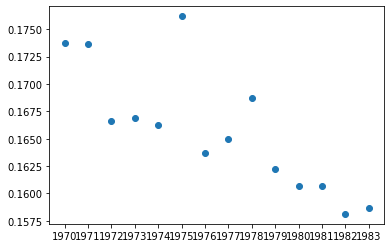

In [34]:
plt.scatter(x,y)
plt.show()

Textblob sentiment

In [35]:
y_polarity = df.groupby('Year')['polarity'].mean()

In [36]:
x_polarity = y_polarity.index

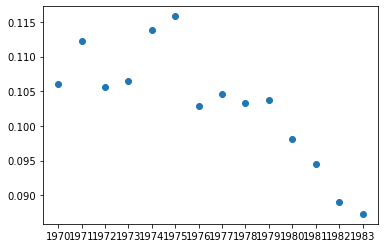

In [37]:
plt.scatter(x_polarity,y_polarity)
plt.show()

<h2> 5. polarity mean by country </h2>

In [39]:
mean_country = df_vader.groupby("Country").mean()

In [40]:
sorted_mean_country = mean_country.sort_values(by=['pos'],ascending=True)

In [41]:
print(sorted_mean_country.head(10))

          Unnamed: 0  polarity  subjectivity       neg       neu       pos  \
Country                                                                      
DMA      1457.500000  0.075196      0.401017  0.078500  0.795500  0.126000   
CUB       870.312500  0.075532      0.400823  0.105750  0.762812  0.131250   
LBY       909.562500  0.081772      0.376248  0.109063  0.752063  0.139000   
LCA      1645.333333  0.105981      0.444268  0.095333  0.765000  0.139333   
SYC      1496.833333  0.097353      0.417273  0.073333  0.784500  0.142167   
SGP       942.500000  0.091815      0.434152  0.113063  0.744375  0.142687   
MLI      1098.230769  0.091526      0.412974  0.097385  0.759615  0.143077   
LSO      1182.900000  0.071962      0.390149  0.109400  0.747100  0.143500   
ATG      1789.500000  0.061357      0.435352  0.115500  0.740000  0.144500   
TTO       994.000000  0.102497      0.402328  0.065500  0.789800  0.144900   

         compound  
Country            
DMA      0.999350  
CUB

In [42]:
sorted_mean_country = mean_country.sort_values(by=['polarity'],ascending=True)

In [43]:
print(sorted_mean_country.head(10))

          Unnamed: 0  polarity  subjectivity       neg       neu       pos  \
Country                                                                      
ATG      1789.500000  0.061357      0.435352  0.115500  0.740000  0.144500   
SOM       945.562500  0.065342      0.397001  0.106063  0.741750  0.152250   
LSO      1182.900000  0.071962      0.390149  0.109400  0.747100  0.143500   
ISR       899.312500  0.072949      0.414871  0.108875  0.737062  0.154000   
DMA      1457.500000  0.075196      0.401017  0.078500  0.795500  0.126000   
CUB       870.312500  0.075532      0.400823  0.105750  0.762812  0.131250   
ETH      1058.153846  0.078681      0.399878  0.103308  0.738615  0.158000   
BRB      1153.545455  0.081529      0.421131  0.104727  0.739000  0.156273   
LBY       909.562500  0.081772      0.376248  0.109063  0.752063  0.139000   
SDN       940.687500  0.081873      0.394330  0.100125  0.747938  0.152250   

         compound  
Country            
ATG      0.998100  
SOM